# Employee Satisfaction Data Analysis

    contributer: Annie Yu

In [427]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [428]:
# Read data from dataset
data = pd.read_csv('Boston_crime.csv', encoding='latin-1')
print(data.columns)

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')


In [429]:
#preview of data
data.iloc[:10,:]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,9/2/2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,8/21/2018 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,9/3/2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,9/3/2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,9/3/2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,9/3/2018 21:09,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,9/3/2018 21:25,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,9/3/2018 20:39,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,9/3/2018 20:48,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,9/3/2018 20:38,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [430]:
#get size of data
length = np.array(data['INCIDENT_NUMBER'])
length.size

319073

In [431]:
#check for missing data
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

# Question 1: Which (top 10) districts are crimes most likely to occur?

#1. Analyze/prepare the data for visualization

In [432]:
#Using column district
#fill in missing data with X to represent unknown district
data['DISTRICT'] = data['DISTRICT'].fillna('0')
#check that missing data is filled
data['DISTRICT'].isnull().sum()

0

In [433]:
#Create dataframe of district to analyze it
dist = np.array(data['DISTRICT'])
df = pd.DataFrame({'District': dist})
#Get the distinct districts
places = df.District.unique()

In [479]:
#list for counted number of crimes
cdist = []
for i in range (ind.size):
    #finds district at i in distinct districts
    tmp = df['District'] == places[i]
    #count number of crimes
    cdist.append(tmp.sum())

In [481]:
#create dataframe of results
q1 = pd.DataFrame({'District': places,'Number of Crimes': cdist})

sortedQ1 = q1.sort_values(by=['Number of Crimes'], ascending=False)
#reindex the dataframe to list crimes from largest to smallest
sortedQ1.index = np.arange(0,13)
sortedQ1

,District,Number of Crimes
0,B2,49945
1,C11,42530
2,D4,41915
3,A1,35717
4,B3,35442
5,C6,23460
6,D14,20127
7,E13,17536
8,E18,17348
9,A7,13544


#2. Graph the Data

<BarContainer object of 10 artists>

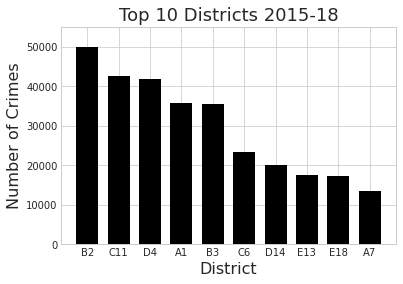

In [517]:
#plot a bar graph
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
ax.set_xlabel('District', fontsize=16)
ax.set_ylabel('Number of Crimes', fontsize=16)
ax.set_title('Top 10 Districts 2015-18', fontsize=18)
ax.set_ylim(0, 55000)

ax.bar(sortedQ1['District'].values[:10], sortedQ1['Number of Crimes'].values[:10],  width = .7, color = 'black')

# Question 2: Does the number of crimes decrease or increase depending on the month? Day of the week?

#1. Analyze/prepare the data for visualization

In [379]:
#Create dataframe for analyzing
month = np.array(data['MONTH'])
week = np.array(data['DAY_OF_WEEK'])
df = pd.DataFrame({'Month': month, 'DayofWeek': week})
#preview of dataframe
df[:10]

,Month,DayofWeek
0,9,Sunday
1,8,Tuesday
2,9,Monday
3,9,Monday
4,9,Monday
5,9,Monday
6,9,Monday
7,9,Monday
8,9,Monday
9,9,Monday


In [380]:
#create list of unique variables
week = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
month = np.arange(1,13)

In [381]:
#counts the number of crimes for each day of the week
cWeek = []
for i in range (len(week)):
    tmp = df['DayofWeek'] == week[i]
    cWeek.append(tmp.sum())
    
#counts the number of crimes for each month
cMonth = []
for i in range (month.size):
    tmp = df['Month'] == month[i]
    cMonth.append(tmp.sum())

In [382]:
#create dataframe of results
#shorten the strings to first 3 letter
for i in range(7): 
        week[i] = week[i][:3]
q2a = pd.DataFrame({'Week': week,'Number of Crimes': cWeek})

month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
q2b = pd.DataFrame({'Month': month,'Number of Crimes': cMonth})
q2a

,Week,Number of Crimes
0,Sun,40313
1,Mon,45679
2,Tue,46383
3,Wed,46729
4,Thu,46656
5,Fri,48495
6,Sat,44818


In [383]:
q2b

,Month,Number of Crimes
0,Jan,23610
1,Feb,21653
2,Mar,24146
3,Apr,24086
4,May,26199
5,Jun,30568
6,Jul,34556
7,Aug,34823
8,Sep,26543
9,Oct,25737


#2. Graph the Data

<BarContainer object of 7 artists>

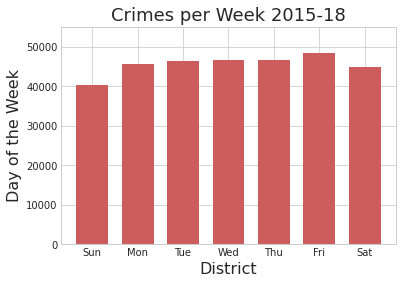

In [513]:
#plot a bar graph
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
ax.set_xlabel('District', fontsize=16)
ax.set_ylabel('Day of the Week', fontsize=16)
ax.set_title('Crimes per Week 2015-18', fontsize=18)
ax.set_ylim(0, 55000)

ax.bar(q2a['Week'].values, q2a['Number of Crimes'].values,  width = .7, color = 'indianred')

<BarContainer object of 12 artists>

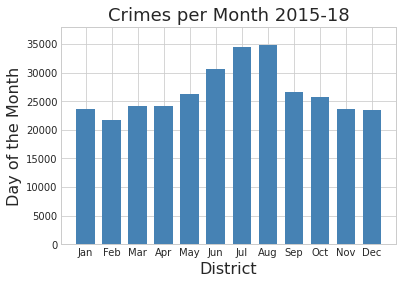

In [511]:
#plot a bar graph
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
ax.set_xlabel('District', fontsize=16)
ax.set_ylabel('Day of the Month', fontsize=16)
ax.set_title('Crimes per Month 2015-18', fontsize=18)
ax.set_ylim(0, 38000)

ax.bar(q2b['Month'].values, q2b['Number of Crimes'].values,  width = .7, color ='SteelBlue')

# Question 3: What are the top 10 most common crimes?

#1. Analyze/prepare the data for visualization

In [384]:
#Create dataframe for analyzing
code = np.array(data['OFFENSE_CODE'])
crime = np.array(data['OFFENSE_DESCRIPTION'])
df = pd.DataFrame({'Offense_Code': code})

In [385]:
#create a dictionary for the offense description 
dictionary = pd.Series(crime, index = code)
#get distinct offense codes in the data
unqCode = df.Offense_Code.unique()

In [386]:
#count the number of crimes for each distinct offense code
cCode = []
for i in range (len(unqCode)):
    tmp = df['Offense_Code'] == unqCode[i]
    cCode.append(tmp.sum())

1a. Sort the data by the number of crimes largest to smallest

In [387]:
#create data frame of distinct crime codes and number of crimes
q3 = pd.DataFrame({'Offense Code': crimes,'Number of Crimes': cCode})
#sorts the data
sortedQ3 = q3.sort_values(by=['Number of Crimes'], ascending=False)
#reindex the dataframe to list crimes from largest to smallest
sortedQ3.index = np.arange(0,222)
#preview of sorted data
sortedQ3[:10]

,Offense Code,Number of Crimes
0,3006,18783
1,3115,18754
2,3831,16323
3,1402,15154
4,802,14799
5,3301,13099
6,3410,11287
7,3114,11124
8,617,9074
9,2647,9042


In [388]:
#Get the offense description of the top 10 crimes 
#using the dictionary
name =[]
for i in range (10):
    tmp = dictionary[sortedQ3['Offense Code'][i]]
    name.append(tmp.values[0])

In [389]:
#create dataframe of results
q3 = pd.DataFrame({'Offense Description': name,'Number of Crimes': sortedQ3['Number of Crimes'][:10]})
q3

,Offense Description,Number of Crimes
0,SICK/INJURED/MEDICAL - PERSON,18783
1,INVESTIGATE PERSON,18754
2,M/V - LEAVING SCENE - PROPERTY DAMAGE,16323
3,VANDALISM,15154
4,ASSAULT SIMPLE - BATTERY,14799
5,VERBAL DISPUTE,13099
6,TOWED MOTOR VEHICLE,11287
7,INVESTIGATE PROPERTY,11124
8,LARCENY THEFT FROM BUILDING,9074
9,THREATS TO DO BODILY HARM,9042


#2. Graph the data

<BarContainer object of 10 artists>

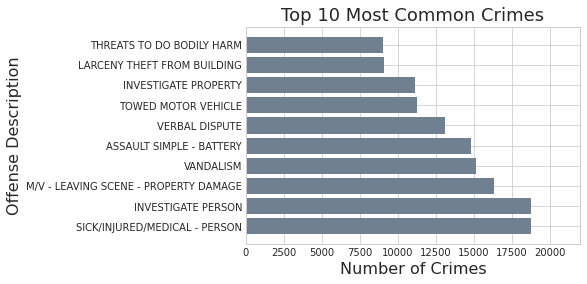

In [510]:
#plot a bar graph
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
ax.set_xlabel('Number of Crimes', fontsize=16)
ax.set_ylabel('Offense Description', fontsize=16)
ax.set_title('Top 10 Most Common Crimes', fontsize=18)
ax.set_xlim(0, 22000)

ax.barh(q3['Offense Description'].values, q3['Number of Crimes'].values, color = 'slategray')